#### Import Libraries

pandas - Analysis and manipulation of data

sklearn - Evaluates and Forms Machine learning models

matplotlib - Visualization of the Data

sqlite3 - Integration of Database (Using SQL)

In [86]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import sqlite3

#### Loading Data

The credit card transactional data is converted from a csv format into a pandas dataframe, allowing for ease of analysis.

The dataframe is split into 2 sections, **X** and **y**. All columns of the dataframe are kept in variable **X**, except "Class". On the other hand, section y only constains "Class" column. The values in the column indicate whether a transaction is fraudulent (1) or legitimate (0).

The key idea of this concept is to train the model to find patterns within X, which would help us predict **y**. 

In [87]:
# Data Loading
df = pd.read_csv("creditcard.csv")

# Data Preparation
X = df.drop('Class', axis=1)  # Features
y = df['Class']               # Target

#### Training and Testing Models


Credit Card Transactions contains sensitive information and so to encrpyt the details and protect the privacy of the customers, values are stored in encripted variables (V1-V28). The machine learning model uses 80% of the transactions (X_train, y_train) to learn what constitues a fraudulent payments, allowing us to predict the remaining 20%. The result is tested against the actual results to determine the accuracy of our prediction.

In [88]:
# Splitting the data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Training with Random Forest Model

model = RandomForestClassifier()
model.fit(X_train, y_train)

# Test Model
predictions = model.predict(X_test)
print(f"Accuracy of test sample: {accuracy_score(y_test, predictions)}")

# Fraud Detection Check
# printing type(y_test), suggest a panda series
fraud_count = sum(y_test == 1)
# & is used rather than "and", otherwise error
detected_fraud = sum((y_test == 1) & (predictions == 1))
print(f"Detected {detected_fraud} fraud cases, out of {fraud_count}")

Accuracy of test sample: 0.9997
Detected 26 fraud cases, out of 29


#### Implementing SQLite to Filter the Database

A database called fraud.db is created to allow sql to be implemented. The dataframe **df** is stored into the sql database (fraud.db) within a table called transactions

In [89]:
# Create SQLite Database

link = sqlite3.connect('fraud.db')
df.to_sql('transactions', link, if_exists='replace')

# query = """ SELECT.... """ allows for easier readability
query = """
SELECT * 
FROM transactions 
WHERE Amount > 1000 
ORDER BY Time DESC 
LIMIT 100
"""

high_value_transaction = pd.read_sql(query, link)


#### Visualization

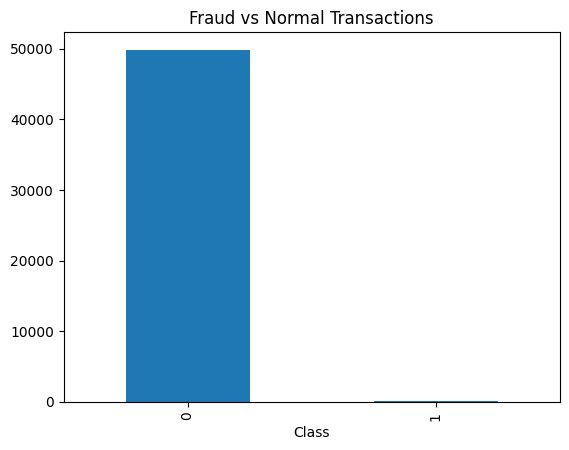

In [90]:
df['Class'].value_counts().plot(kind='bar')
plt.title('Fraud vs Normal Transactions');

In [91]:
# Create a fraud-only DataFrame
fraud_df = df[df['Class'] == 1]

# Then calculate average
avg_fraud_amount = fraud_df['Amount'].mean()

print(f"Average fraud amount: £{avg_fraud_amount:.2f}")

Average fraud amount: £100.17
